## Figures theory chapter

Figures shown in Chapter 2 of my thesis

### References
- Bühl, J., Seifert, P., Myagkov, A., Ansmann, A., 2016. Measuring ice- and liquid-water properties in mixed-phase cloud layers at the Leipzig Cloudnet station. Atmospheric Chemistry and Physics 16, 10609–10620. [doi:10.5194/acp-16-10609-2016](https://doi.org/10.5194/acp-16-10609-2016)



In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np
from types import SimpleNamespace

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import analytic_formulas as af

In [20]:
%matplotlib inline

In [21]:

Ts = np.arange(-40,0,7)

rho_w = af.density_supercooled_water(Ts+273.15)
print(rho_w)


params = dict(Lw='RY',rho_w='HS', D='HP', Ei='GG', Ew='GG')
f = af.get_factors(273.15+Ts, 680e2, **params)
print(f.ksi)
params = dict(Lw='RY',rho_w='HS', D='HP', Ei='AB', Ew='AB')
f = af.get_factors(273.15+Ts, 680e2, **params)
print(f.ksi)
params = dict(Lw='RY',rho_w='HS', D='HP', Ei='M', Ew='M')
f = af.get_factors(273.15+Ts, 680e2, **params)
print(f.ksi)

[962.71936    979.29787995 988.55547633 994.12854572 997.49713443
 999.29105414]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'GG', 'Ew': 'GG'}
[1.47361024 1.37864528 1.28838342 1.20337873 1.12381745 1.04966516]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'AB', 'Ew': 'AB'}
[1.47720893 1.38068384 1.28953684 1.2040185  1.12416666 1.04987298]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
[1.46088049 1.37066734 1.28367813 1.20082554 1.12263035 1.04933103]


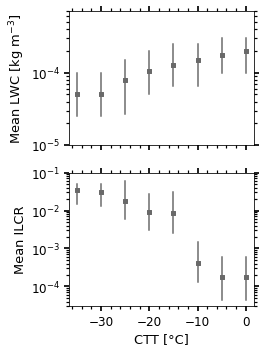

In [22]:
# 0C 4e-2/200 -> 2e-4
# 3e-2/200 -> 1.5e-4
# 2.3e-2/200 -> 1.15e-4
#1e-2/200 -> 5e-5

# typical_lwc = np.array([5e-5, 5e-5, 1.07e-4, 1.5e-4, 2e-4])
# T = np.array([-40, -30, -20, -10, 0])
T = np.array([-35, -30, -25, -20, -15, -10,  -5,   0,])
typical_lwc = np.array([5.00e-5, 5.00e-5, 7.85e-5, 1.07e-4, 1.29e-4, 1.50e-4, 1.75e-4, 2.00e-4])
typical_lwc_min = np.array([2.50e-5, 2.50e-5, 2.7e-5, 0.5e-4, 0.65e-4, 0.65e-4, 1e-4, 1e-4])
typical_lwc_max = np.array([1.0e-4, 1.0e-4, 1.5e-4, 2.0e-4, 2.5e-4, 2.5e-4, 3e-4, 3e-4])


T = np.array([-35, -30, -25, -20, -15, -10, -5, 0])
typical_ilcr = np.array([3.4e-2, 3e-2, 1.8e-2, 9e-3, 8.5e-3, 4.2e-4, 1.8e-4, 1.8e-4])
typical_ilcr_min = np.array([1.5e-2, 1.35e-2, 6e-3, 3e-3, 2.5e-3, 1.3e-4, 4.5e-5, 4.5e-5])
typical_ilcr_max = np.array([5e-2, 5e-2, 6e-2, 2.8e-2, 3e-2, 1.5e-3, 6e-4, 6e-4])

# Ti = np.arange(-40,1,5)
# print(Ti)
# print(np.interp(Ti, T, typical_lwc))

fig, ax = plt.subplots(2, 1, figsize=(3.8, 5), sharex=True)

for e in zip(T, typical_lwc_min, typical_lwc_max):
    ax[0].plot([e[0],e[0]], [e[1], e[2]], '-', color='dimgrey')
ax[0].scatter(T, typical_lwc, marker='s', s=12, color='dimgrey')



ax[0].set_yscale('log')
ax[0].set_ylabel('Mean LWC [kg m$^{-3}$]', fontsize=13)
ax[0].set_ylim(1e-5, 7e-4)

for e in zip(T, typical_ilcr_min, typical_ilcr_max):
    ax[1].plot([e[0],e[0]], [e[1], e[2]], '-', color='dimgrey')
ax[1].scatter(T, typical_ilcr, marker='s', s=12, color='dimgrey')

ax[1].set_yscale('log')
ax[1].set_ylabel('Mean ILCR', fontsize=13)
ax[1].set_ylim(3e-5, 1e-1)
ax[1].set_xlabel('CTT [°C]', fontsize=13)

for a in ax:
    a.tick_params(axis='both', which='both', right=True, top=True)
    a.tick_params(axis='both', which='major', labelsize=12,
                   width=1.7, length=5)
    a.tick_params(axis='both', which='minor', width=1.2, length=3)
    a.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    # ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

fig.tight_layout()

fig.savefig('plots/ILCR_LWC_Bühl2016.png', dpi=250)

In [23]:
def t_gl(Ni, qw, qi, f, Nw=False,):
    """Pinsky 2014
    
    eq 15a
    """
    
    if Nw:
        T2 = f.ksi*qw**(2/3)/(f.upsilon_w*f.Bw*Nw**(2/3))
    else:
        T2 = 0
    
    T1 = (((qi+f.a1/f.a2*qw)/Ni)**(2/3) - (qi/Ni)**(2/3))/(f.upsilon_i*f.Bi)
    
#     print(3/(2*(f.ksi-1)*f.upsilon_i*f.Bi))
#     print('T1', T1)
#     print('T2', T2)
#     print('ksi', f.ksi - 1)
    tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
    
    return tau_gl


print(t_gl(1000e3, 1e-4, 0, af.get_factors(273.15-20, 750e2, **params)))
print(t_gl(500e3, 1e-4, 0, af.get_factors(273.15-20, 750e2, **params)))
1/(97.66061638636636/155.0265651875807)

input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
110.4391186825909
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
175.31117317518562


1.5874010519681991

input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
[5.170000e-05 5.150000e-05 7.991300e-05 1.079630e-04 1.300965e-04
 1.500630e-04 1.750315e-04 2.000360e-04]
[511.92307061 511.26209754 591.89817289 654.3340227  696.29999502
 730.24018641 768.68178978 803.66904644]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
[5.170000e-05 5.150000e-05 7.991300e-05 1.079630e-04 1.300965e-04
 1.500630e-04 1.750315e-04 2.000360e-04]
[237.61364082 237.3068443  274.73479499 303.71494932 323.19382817
 338.94746951 356.7904812  373.03012719]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
[110.2904822  110.14807986 127.52059566 140.97199174 150.01328639
 157.32547897 165.60747135 173.14524729]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M', 'Ew': 'M'}
[51.19230706 51.12620975 59.18981729 65.43340227 69.6299995  73.02401864
 76.86817898 80.36690464]
input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'M

<ipython-input-23-92e291ee13ff>:18: RuntimeWarning: divide by zero encountered in true_divide
  tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
<ipython-input-23-92e291ee13ff>:18: RuntimeWarning: divide by zero encountered in true_divide
  tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
<ipython-input-23-92e291ee13ff>:18: RuntimeWarning: divide by zero encountered in true_divide
  tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
<ipython-input-23-92e291ee13ff>:18: RuntimeWarning: divide by zero encountered in true_divide
  tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)
<ipython-input-23-92e291ee13ff>:18: RuntimeWarning: divide by zero encountered in true_divide
  tau_gl = 3/(2*(f.ksi - 1))*(T1 + T2)


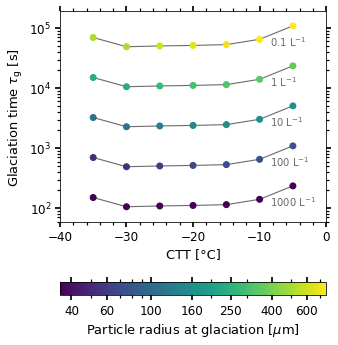

In [24]:

fig, ax = plt.subplots(figsize=(4.8, 5))

mass_in_ice = typical_lwc+typical_ilcr*typical_lwc
tau = t_gl(0.1e3, typical_lwc, typical_ilcr*typical_lwc, af.get_factors(273.15+T, 750e2, **params))
ax.plot(T, tau, lw=1.1, color='dimgrey')
ax.text(-8.5, tau[-3]*1.2, '0.1 L$^{-1}$', verticalalignment='top', color='dimgrey')
N = 0.1e3
r = (mass_in_ice*3/(N*af.rho_i*4*np.pi))**(1/3)
print(mass_in_ice)
print(r*1e6)
# m = N*rho*4/3pir**3
scat = ax.scatter(T, tau, c=r*1e6,
                  cmap='viridis',
                  norm=matplotlib.colors.LogNorm(vmin=35, vmax=750),
                  zorder=3
                 )


tau = t_gl(1e3, typical_lwc, typical_ilcr*typical_lwc, af.get_factors(273.15+T, 750e2, **params))
ax.plot(T, tau, lw=1.1, color='dimgrey')
ax.text(-8.5, tau[-3]*1.2, '1 L$^{-1}$', verticalalignment='top', color='dimgrey')
N = 1e3
r = (mass_in_ice*3/(N*af.rho_i*4*np.pi))**(1/3)
print(mass_in_ice)
print(r*1e6)
# m = N*rho*4/3pir**3
scat = ax.scatter(T, tau, c=r*1e6,
                  cmap='viridis',
                  norm=matplotlib.colors.LogNorm(vmin=35, vmax=750),
                  zorder=3
                 )

tau = t_gl(10e3, typical_lwc, typical_ilcr*typical_lwc, af.get_factors(273.15+T, 750e2, **params))
ax.plot(T, tau, lw=1.1, color='dimgrey')
ax.text(-8.5, tau[-3]*1.2, '10 L$^{-1}$', verticalalignment='top', color='dimgrey')
N = 10e3
r = (mass_in_ice*3/(N*af.rho_i*4*np.pi))**(1/3)
print(r*1e6)
scat = ax.scatter(T, tau, c=r*1e6,
                  cmap='viridis',
                  norm=matplotlib.colors.LogNorm(vmin=35, vmax=750),
                  zorder=3
                 )

tau = t_gl(100e3, typical_lwc, typical_ilcr*typical_lwc, af.get_factors(273.15+T, 750e2, **params))
ax.plot(T, tau, lw=1.1, color='dimgrey')
ax.text(-8.5, tau[-3]*1.2, '100 L$^{-1}$', verticalalignment='top', color='dimgrey')
N = 100e3
r = (mass_in_ice*3/(N*af.rho_i*4*np.pi))**(1/3)
print(r*1e6)
scat = ax.scatter(T, tau, c=r*1e6,
                  cmap='viridis',
                  norm=matplotlib.colors.LogNorm(vmin=35, vmax=750),
                  zorder=3
                 )

tau = t_gl(1000e3, typical_lwc, typical_ilcr*typical_lwc, af.get_factors(273.15+T, 750e2, **params))
ax.plot(T, tau, lw=1.1, color='dimgrey')
ax.text(-8.5, tau[-3]*1.2, '1000 L$^{-1}$', verticalalignment='top', color='dimgrey')
N = 1000e3
r = (mass_in_ice*3/(N*af.rho_i*4*np.pi))**(1/3)
print(r*1e6)
scat = ax.scatter(T, tau, c=r*1e6,
                  cmap='viridis',
                  norm=matplotlib.colors.LogNorm(vmin=35, vmax=750),
                  zorder=3
                 )

cbar = fig.colorbar(scat, orientation="horizontal", pad=0.19)
cbar.set_label('Particle radius at glaciation [$\\mu$m]', fontsize=13)

ax.set_ylim([6e1, 1.9e5])
ax.set_yscale('log')
ax.set_xlim([-40, 0])

ax.set_ylabel('Glaciation time $\\tau_{\\mathrm{g}}$ [s]', fontsize=13)
ax.set_xlabel('CTT [°C]', fontsize=13)

# ax.legend(fontsize=11, ncol=3)

ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)
cbar.ax.tick_params(axis='both', which='both', right=True, top=True)
cbar.ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
cbar.ax.tick_params(axis='both', which='minor', width=1.2, length=3)
# cbar.ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=3.0, numdecs=10))
cbar.ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([40,60,100,160, 250, 400, 600]))
# cbar.ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator([30, 50, 60, 70, 80, 90, 100, 200, 300,400]))
cbar.ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
cbar.ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

fig.tight_layout()
fig.savefig('plots/glaciation_time_wbühl2016.png', dpi=250)

In [25]:
print("Niri 1e-1")
print("ri[um] for 1L-1", 1e-1/1e3*1e6)
print("ri[um] for 1000L-1", 1e-1/1000e3*1e6)

print("Niri 2e-1")
print("ri[um] for 1L-1", 1e2/1e3*1e6)
print("ri[um] for 1000L-1", 1e2/1000e3*1e6)

Niri 1e-1
ri[um] for 1L-1 100.0
ri[um] for 1000L-1 0.1
Niri 2e-1
ri[um] for 1L-1 100000.0
ri[um] for 1000L-1 100.0


input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'AB', 'Ew': 'AB'}
(40, 50)


<ipython-input-26-982996be4d82>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcmesh = ax.pcolormesh(Ni*1e-3, ri*1e6, uz_star,


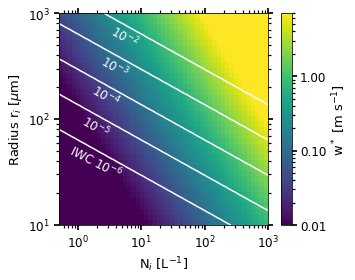

In [26]:
def get_uz_star(Niri, f):
       
    uz_star = f.bi_s*Niri/f.a0 #critical (updraft) velocity for water growth
    eta = f.a2*f.Bi_0/f.a0
    uz_star2008 = ((f.Ew-f.Ei)/f.Ei)*f.eta*Niri
    
    return uz_star
    
    
T = -20
Ni = np.logspace(2.7, 6)
ri = np.logspace(-5, -3,40)

Niv, riv = np.meshgrid(Ni, ri)
Niri = Niv*riv
IWC = 4.0/3.0*np.pi*Niv*riv**3*af.rho_i


params = dict(Lw='RY',rho_w='HS', D='HP', Ei='AB', Ew='AB')
params_alt = dict()

fig, ax = plt.subplots(figsize=(5, 4))

uz_star = get_uz_star(Niri, af.get_factors(273.15+T, 750e2, **params))

print(uz_star.shape)

pcmesh = ax.pcolormesh(Ni*1e-3, ri*1e6, uz_star,
                       norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=7)
                      )

cont = ax.contour(Ni*1e-3, ri*1e6, IWC,
                  levels=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
                  colors='white'
                 )


f = matplotlib.ticker.ScalarFormatter(useMathText=True)

IWC = 1e-6
ax.text(0.8*2.45, (3*IWC/(4*af.rho_i*np.pi*(0.8*1.45e3)))**(1/3)*1e6, 
        "IWC ${}$".format(f.format_data(IWC)), 
        horizontalalignment='center', rotation=-27,
        verticalalignment='top', fontsize=12, color='white')
IWC = 1e-5
ax.text(0.8*2.4, (3*IWC/(4*af.rho_i*np.pi*(0.8*2e3)))**(1/3)*1e6, 
        "${}$".format(f.format_data(IWC)), 
        horizontalalignment='center', rotation=-30,
        verticalalignment='top', fontsize=12, color='white')
IWC = 1e-4
ax.text(0.8*3.5, (3*IWC/(4*af.rho_i*np.pi*(0.8*2.8e3)))**(1/3)*1e6, 
        "${}$".format(f.format_data(IWC)), 
        horizontalalignment='center', rotation=-30,
        verticalalignment='top', fontsize=12, color='white')
IWC = 1e-3
ax.text(0.75*5, (3*IWC/(4*af.rho_i*np.pi*(0.75*4.3e3)))**(1/3)*1e6, 
        "${}$".format(f.format_data(IWC)), 
        horizontalalignment='center', rotation=-30,
        verticalalignment='top', fontsize=12, color='white')
IWC = 1e-2
ax.text(0.7*7.7, (3*IWC/(4*af.rho_i*np.pi*(0.7*6.5e3)))**(1/3)*1e6, 
        "${}$".format(f.format_data(IWC)), 
        horizontalalignment='center', rotation=-30,
        verticalalignment='top', fontsize=12, color='white')


cbar = fig.colorbar(pcmesh)
cbar.set_label('w$^*$ [m s$^{-1}$]', fontsize=13)


ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim([1e-4, 1e1])
ax.set_ylabel('Radius r$_i$ [$\\mu$m]', fontsize=13)
ax.set_xlabel('N$_i$ [L$^{-1}$]', fontsize=13)


ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)
cbar.ax.tick_params(axis='both', which='both', right=True, top=True)
cbar.ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
cbar.ax.tick_params(axis='both', which='minor', width=1.2, length=3)
cbar.ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
fig.savefig('plots/w_crit_2d.png', dpi=250)

In [27]:
from scipy.ndimage import median_filter

In [28]:
def t_gl_u(Ni, lwc, iwc, u, f, Nw=False,):
    """Pinsky 2014
    
    eq 23
    """
    
    qw = lwc/f.rho_a
    qi = iwc/f.rho_a
    
    Nip23 = Ni**(2/3)
    Nwp23 = Nw**(2/3)
    
    gamma = (3*f.a0*u)/(2*(f.ksi-1)*f.upsilon_i*f.Bi*Nip23*f.a2)
    
    q0 = (qi + f.a1*qw/f.a2 \
          - (((3*qi**(2/3))/(2*(f.ksi-1)*f.upsilon_i*f.Bi*Nip23)) - \
             ((3*f.ksi*qw**(2/3))/(2*(f.ksi-1)*f.upsilon_w*f.Bw*Nwp23)))*(f.a0/f.a2*u))
    

    discr = (- (4*gamma**3*q0**3+27*q0**4)).astype(np.complex64)
    
    case = (4*gamma**3 + 27*q0)
#     print('discr ', discr)
    print('case ', 4*gamma**3 + 27*q0)
    
    #print('inside root', -3*discr, np.sqrt(-3*discr))   
        
#     a = 1
#     b = -1*gamma**2
#     c = -2*q0*gamma
#     d = -1*q0**2
#     roots = np.roots([a, b, c, d])
#     print('numpy ', roots)

    t72_108_8_12 = (72*gamma**3*q0 + 108*q0**2 + 8*gamma**6 + 12*np.sqrt(-3*discr))
    tt1 = t72_108_8_12**(1/3)/6 \
          + gamma**2/3 \
          + 2*gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3)
    
    tt2 = -1/12*t72_108_8_12**(1/3) \
          + gamma**2/3 \
          - gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3) \
          + (np.sqrt(3)/2)*np.array(1j)*(t72_108_8_12**(1/3)/6 - 2*gamma*(2*q0 + gamma**3/3)*t72_108_8_12**(-1/3))
    
#     print('tt1', tt1)
#     print('tt2', tt2)
    tt = np.zeros_like(tt1)
    tt[case > 0] = tt1[case > 0]
    tt[case < 0] = tt2[case < 0]
    # values too close to 0 cause numerical problems
    tt[np.abs(case)< 0.0005] = np.nan
    
#     print(tt)
    tt = np.real(tt)

#     print('tt ', tt)
    tau_gl = 3/(2*(f.ksi - 1)*f.upsilon_i*f.Bi*Nip23)*tt - \
            3/(2*(f.ksi - 1))*((qi**(2/3)/(f.upsilon_i*f.Bi*Nip23))-((f.ksi*qw**(2/3))/(f.upsilon_w*f.Bw*Nwp23)))
    
    return tau_gl


input kwargs:  {'Lw': 'RY', 'rho_w': 'HS', 'D': 'HP', 'Ei': 'AB', 'Ew': 'AB'}
case  [-1.76452665e+04 -1.62041775e+04 -1.48437679e+04 -1.35617134e+04
 -1.23556901e+04 -1.12233738e+04 -1.01624404e+04 -9.17056582e+03
 -8.24542599e+03 -7.38469679e+03 -6.58605414e+03 -5.84717394e+03
 -5.16573209e+03 -4.53940450e+03 -3.96586706e+03 -3.44279570e+03
 -2.96786630e+03 -2.53875479e+03 -2.15313705e+03 -1.80868900e+03
 -1.50308654e+03 -1.23400557e+03 -9.99122004e+02 -7.96111744e+02
 -6.22650694e+02 -4.76414759e+02 -3.55079843e+02 -2.56321852e+02
 -1.77816690e+02 -1.17240263e+02 -7.22684738e+01 -4.05772288e+01
 -1.98424325e+01 -7.73998972e+00 -1.94580520e+00 -1.35783836e-01
  1.41695558e-02  8.28150138e-01  4.63025308e+00  1.37445735e+01
  3.04952067e+01  5.72062477e+01  9.62017917e+01  1.49805934e+02
  2.20342770e+02  3.10136394e+02  4.21510901e+02  5.56790388e+02
  7.18298949e+02  9.08360679e+02  1.12929967e+03  1.38344003e+03
  1.67310584e+03  2.00062119e+03  2.36831020e+03  2.77849694e+03
  3.23

<ipython-input-36-6fc2fbbafb65>:38: RuntimeWarning: invalid value encountered in greater
  tau[u*tau > 4000] = np.nan
<ipython-input-36-6fc2fbbafb65>:42: RuntimeWarning: invalid value encountered in greater
  tau[u*tau > 4000] = np.nan


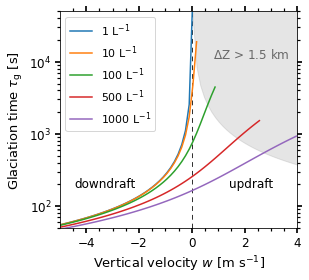

In [36]:
u = np.arange(-5,4.5,0.14)


fig, ax = plt.subplots(figsize=(4.4, 4))

thres = 1500/u
thres[thres < 0] =np.nan
ax.fill_between(u, thres, 1e5, color='grey', alpha=0.2)
ax.text(2.25, 1.6e4, 
        "$\Delta $Z > 1.5 km", 
        horizontalalignment='center',
        verticalalignment='top', fontsize=12, color='dimgrey')

ax.text(2.25, 2.5e2, 
        "updraft", 
        horizontalalignment='center',
        verticalalignment='top', fontsize=12, color='black')
ax.text(-3.3, 2.5e2, 
        "downdraft", 
        horizontalalignment='center',
        verticalalignment='top', fontsize=12, color='black')

ax.axvline(0, lw=0.8, ls=(0, (6, 5)), color='black')

tau = t_gl_u(1e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 750e2, **params), Nw=100e6)
tau[u*tau > 4000] = np.nan
ax.plot(u[~np.isnan(tau)], tau[~np.isnan(tau)], label='1 L$^{-1}$')

tau = t_gl_u(10e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 750e2, **params), Nw=100e6)
tau[u*tau > 4000] = np.nan
ax.plot(u[~np.isnan(tau)], tau[~np.isnan(tau)], label='10 L$^{-1}$')

tau = t_gl_u(100e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 750e2, **params), Nw=100e6)
tau[u*tau > 4000] = np.nan
ax.plot(u[~np.isnan(tau)], tau[~np.isnan(tau)], label='100 L$^{-1}$')

tau = t_gl_u(500e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 750e2, **params), Nw=100e6)
tau[u*tau > 4000] = np.nan
ax.plot(u[~np.isnan(tau)], tau[~np.isnan(tau)], label='500 L$^{-1}$')

tau = t_gl_u(1000e3, 0.2e-3, 1e-7, u, af.get_factors(273.15-15, 750e2, **params), Nw=100e6)
tau[u*tau > 4000] = np.nan
ax.plot(u[~np.isnan(tau)], tau[~np.isnan(tau)], label='1000 L$^{-1}$')

ax.legend(fontsize=11)
ax.set_ylim([5e1, 5e4])
ax.set_yscale('log')
ax.set_xlim([-5, 4])

ax.set_ylabel('Glaciation time $\\tau_\\mathrm{g}$ [s]', fontsize=13)
ax.set_xlabel('Vertical velocity $w$ [m s$^{-1}$]', fontsize=13)

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=1.7, length=5)
ax.tick_params(axis='both', which='minor', width=1.2, length=3)

fig.tight_layout()
fig.savefig('plots/glaciation_time_u.png', dpi=250)